<a href="https://colab.research.google.com/github/GunH-colab/basicsML/blob/master/transferlearning_keras_fMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(tf.__version__)
print(keras.__version__)

%matplotlib inline

''' We are taking the Fashion MNIST datasets and training a model with first 8 classes and call it model1. And then we would 
implement 'transfer learning' on another model with last two classes of fashion MNIST and call it model2on1. 
First we need to frame a model1 and the frame a model2on based on its layers.'''

2.3.0
2.4.0


" We are taking the Fashion MNIST datasets and training a model with first 8 classes and call it model1. And then we would \nimplement 'transfer learning' on another model with last two classes of fashion MNIST and call it model2on1. \nFirst we need to frame a model1 and the frame a model2on based on its layers."

In [2]:
# fetching the dataset

(train_img, train_lab), (test_img, test_lab) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
'''manually separating the two datasets for model1 and model2on1'''

# lists for storing the indexes of the labels

# for storing indexes of labels 0-7
TrainLabSplit1 = []
TestLabSplit1 = []

# for storing indexes of labels 8-9
TrainLabSplit2 = []
TestLabSplit2 = []

# lists for recording the labels

# for storing labels 0-7
TrainLS1 = []
TestLS1 = []
# for storing labels 8-9
TrainLS2 = []
TestLS2 = []

for ind, img in enumerate(train_lab):
  if img >= 0 and img <= 7:
    TrainLabSplit1.append(ind)
    TrainLS1.append(img)
  else:
    TrainLabSplit2.append(ind)
    TrainLS2.append(img)

for ind, img in enumerate(test_lab):
  if img >= 0 and img <= 7:
    TestLabSplit1.append(ind)
    TestLS1.append(img)
  else:
    TestLabSplit2.append(ind)
    TestLS2.append(img)

In [4]:
TrainLS2

[9,
 9,
 9,
 8,
 8,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 9,
 8,
 8,
 9,
 9,
 8,
 9,
 9,
 8,
 8,
 9,
 8,
 8,
 8,
 9,
 8,
 8,
 9,
 8,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 8,
 9,
 9,
 8,
 8,
 9,
 9,
 8,
 9,
 8,
 8,
 9,
 9,
 8,
 8,
 8,
 8,
 9,
 8,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 8,
 9,
 9,
 8,
 9,
 9,
 8,
 8,
 8,
 9,
 9,
 8,
 9,
 9,
 8,
 8,
 9,
 8,
 9,
 9,
 9,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 9,
 8,
 8,
 8,
 9,
 9,
 8,
 9,
 9,
 9,
 8,
 8,
 9,
 8,
 8,
 9,
 9,
 8,
 8,
 9,
 8,
 9,
 9,
 8,
 8,
 9,
 9,
 8,
 9,
 8,
 8,
 8,
 9,
 9,
 8,
 8,
 8,
 9,
 9,
 8,
 8,
 8,
 9,
 9,
 8,
 9,
 8,
 9,
 8,
 9,
 8,
 9,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 8,
 8,
 9,
 8,
 8,
 9,
 8,
 9,
 9,
 9,
 8,
 9,
 8,
 9,
 8,
 9,
 8,
 9,
 8,
 9,
 8,
 8,
 9,
 9,
 8,
 8,
 9,
 9,
 9,
 9,
 8,
 8,
 9,
 8,
 9,
 9,
 8,
 9,
 8,
 9,
 9,
 9,
 9,
 8,
 9,
 8,
 8,
 8,
 9,
 9,
 8,
 8,
 9,
 8,
 9,
 9,
 8,
 9,
 8,
 9,
 8,
 8,
 9,
 8,
 8,
 8,
 9,
 8,


In [5]:
# respective sizes

print(" model1-train:", len(TrainLabSplit1),"\n model1-test:", len(TestLabSplit1),"\n model2-train:", len(TrainLabSplit2),"\n model2-test:", len(TestLabSplit2))


 model1-train: 48000 
 model1-test: 8000 
 model2-train: 12000 
 model2-test: 2000


In [6]:
# now creating empty numpy array matching the size of the f-MNIST images to store the images for model1 and model2on1

TrainImSplit1 = np.empty([48000, 28, 28], dtype=np.uint8)
TestImSplit1 = np.empty([8000, 28, 28], dtype=np.uint8)
TrainImSplit2 = np.empty([12000, 28, 28], dtype=np.uint8)
TestImSplit2 = np.empty([2000, 28, 28], dtype=np.uint8)

In [7]:
# function to fill the separated images in the above arrays

def imDivider(arrIn, arr, tt):
  for i in range(len(arr)):
    arrIn[i] = tt[arr[i]]

In [8]:
# filling.........

imDivider(TrainImSplit1, TrainLabSplit1, train_img)
imDivider(TrainImSplit2, TrainLabSplit2, train_img)
imDivider(TestImSplit1, TestLabSplit1, test_img)
imDivider(TestImSplit2, TestLabSplit2, test_img)

In [9]:
# official class_names array --> https://github.com/zalandoresearch/fashion-mnist 

class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

In [10]:
# function to view a few images from the manually separated sets

def plotter(imArr, labArr, arr):
  plt.figure(figsize=(12, 8))
  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(imArr[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[arr[labArr[i]]])
  plt.show()

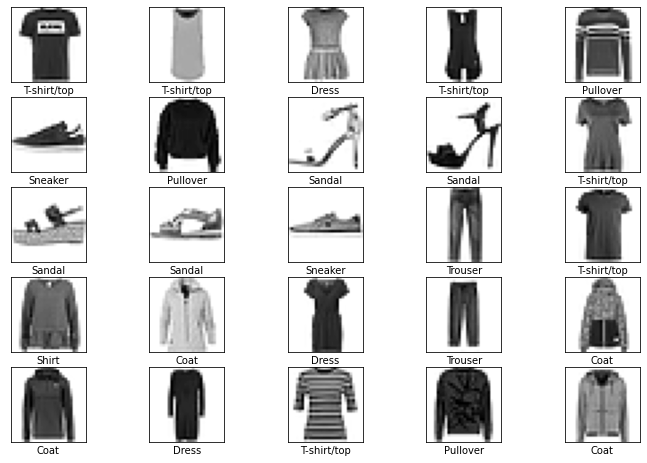

In [11]:
# train images for model 1

plotter(TrainImSplit1, TrainLabSplit1, train_lab)

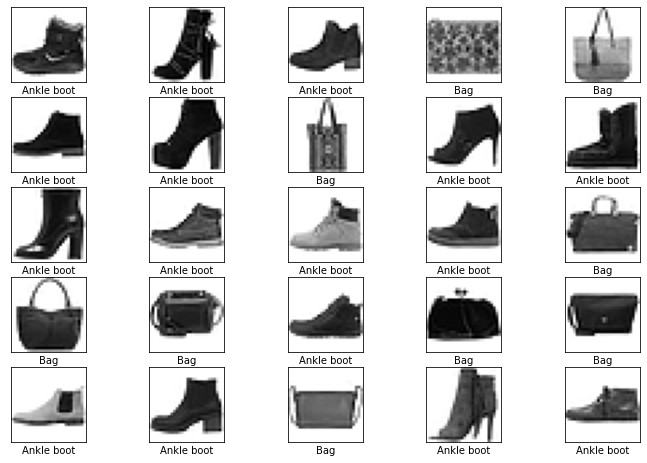

In [12]:
# train images for model 2

plotter(TrainImSplit2, TrainLabSplit2, train_lab)

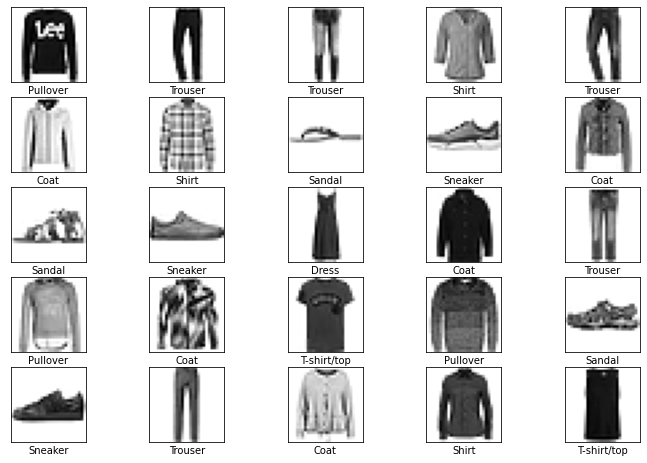

In [13]:
# test images for model 1

plotter(TestImSplit1, TestLabSplit1, test_lab)

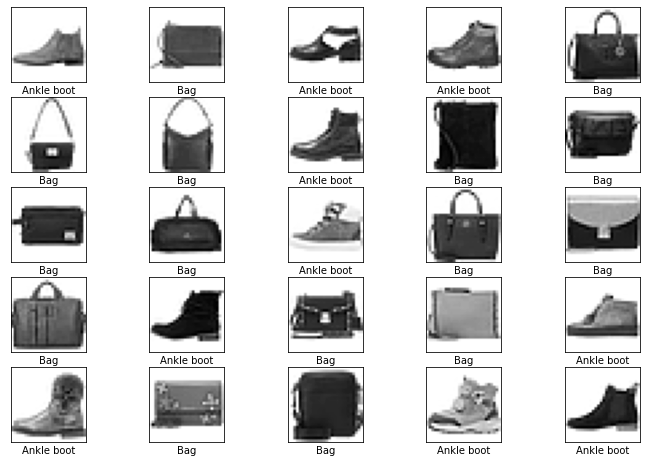

In [14]:
# test images for model2on1

plotter(TestImSplit2, TestLabSplit2, test_lab)

In [15]:
# the model1

model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(500, kernel_initializer="lecun_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("selu"),
    keras.layers.Dense(500, kernel_initializer="lecun_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("selu"),
    keras.layers.Dense(8, activation="softmax")
])

In [16]:
# compiling model1

model1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
# converting the lists to numpy array

TestLS1 = np.array(TestLS1)
TrainLS1 = np.array(TrainLS1)

In [18]:
# training the model1

history1 = model1.fit(TrainImSplit1, TrainLS1, epochs=100, validation_split=0.2)

Epoch 1/100
1200/1200 [==============================] - 13s 11ms/step - loss: 0.5474 - accuracy: 0.8023 - val_loss: 0.4796 - val_accuracy: 0.8277
Epoch 2/100
1200/1200 [==============================] - 14s 12ms/step - loss: 0.4479 - accuracy: 0.8362 - val_loss: 0.4564 - val_accuracy: 0.8357
Epoch 3/100
1200/1200 [==============================] - 11s 10ms/step - loss: 0.4159 - accuracy: 0.8468 - val_loss: 0.4054 - val_accuracy: 0.8551
Epoch 4/100
1200/1200 [==============================] - 12s 10ms/step - loss: 0.3920 - accuracy: 0.8553 - val_loss: 0.4076 - val_accuracy: 0.8518
Epoch 5/100
1200/1200 [==============================] - 12s 10ms/step - loss: 0.3751 - accuracy: 0.8629 - val_loss: 0.3997 - val_accuracy: 0.8557
Epoch 6/100
1200/1200 [==============================] - 11s 10ms/step - loss: 0.3550 - accuracy: 0.8689 - val_loss: 0.3988 - val_accuracy: 0.8574
Epoch 7/100
1200/1200 [==============================] - 12s 10ms/step - loss: 0.3458 - accuracy: 0.8725 - val_loss: 0

In [19]:
# evaluating model

acc, loss = model1.evaluate(TestImSplit1, TestLS1)


250/250 [==============================] - 1s 3ms/step - loss: 0.6201 - accuracy: 0.8708


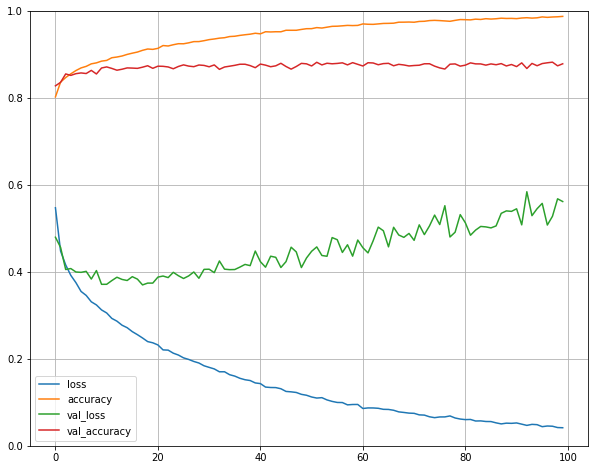

In [20]:
# performance graph

pd.DataFrame(history1.history).plot(figsize=(10, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [21]:
#saving all the predictions of every test_images in 'predictions1' array

predictions1 = model1.predict(TestImSplit1)

In [22]:
#function to view the image and with labels(predicted class, score%, actual class)

def plotImg(i, preds_arr, true_label, img, names):
    true_label, img = true_label[i], img[i]

    plt.yticks([])
    plt.xticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    pred_label = np.argmax(preds_arr)

    if pred_label == true_label:
        COLOR = 'green'
    else:
        COLOR = 'red'

    plt.xlabel("{} {:0.2f}% ({})".format(names[pred_label], 100*np.max(preds_arr), names[true_label]), color=COLOR)


#function to construct bar graphs of the scores of each class

def plotGraph(i, preds_arr, true_label, n):
    true_label = true_label[i]

    plt.xticks(range(n))
    plt.yticks([])
    plt.ylim([0, 1])
    PLOT = plt.bar(range(n), preds_arr, color="#777777")

# for a successfull prediction color is 'green' else 'red'
    PLOT[np.argmax(preds_arr)].set_color('red')
    PLOT[true_label].set_color('green')


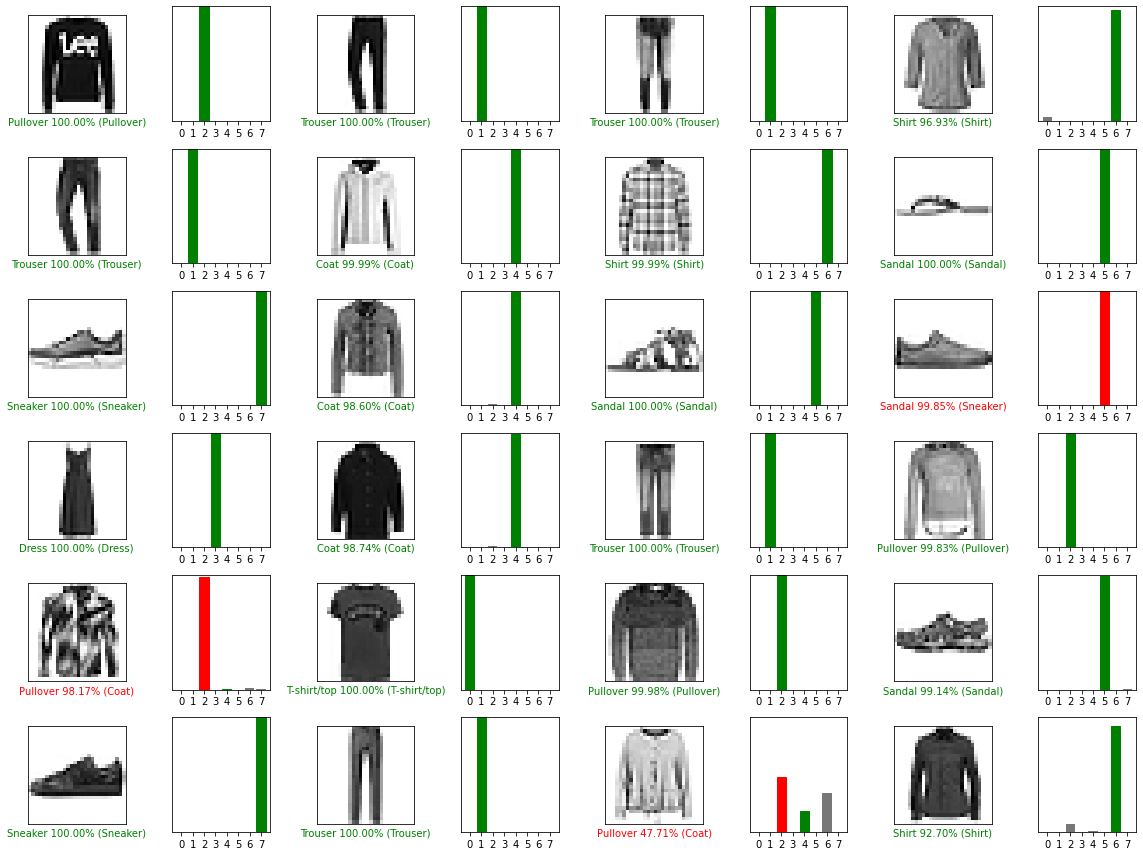

In [23]:
# to produce a mass tight sheet of predictions and their graph

num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plotImg(i, predictions1[i], TestLS1, TestImSplit1, class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plotGraph(i, predictions1[i], TestLS1, 8)
plt.tight_layout()
plt.show()

In [24]:
model1.save("model1.h5")

In [25]:
# When we train model2on1 it will also affect model1 therefore cloning model1's architecture so that the model doesnt change. But its actually required when your are loading a saved model

model_1 = keras.models.load_model("model1.h5")
model2on1 = keras.models.Sequential(model_1.layers[:-1]) # removing the last(output layer)
model2on1.add(keras.layers.Dense(2, activation="softmax"))

In [26]:
# official class_names array --> https://github.com/zalandoresearch/fashion-mnist 

class_names2on1 = [
               'Bag', 
               'Ankle boot'
               ]

In [27]:
# cloning in case you dont't want to let your model1 change its architecture
# CODE

'''
==========================================================================
model1_clone = keras.models.clone_model(model_1)
model1_clone.set_weights(model_1.get_weights())
==========================================================================
'''

'\n==========================================================================\nmodel1_clone = keras.models.clone_model(model_1)\nmodel1_clone.set_weights(model_1.get_weights())\n==========================================================================\n'

In [28]:
'''Now we can start training but since the output layer was initially randomized it will make large errors so there will be large error gradients
 that can ruin the reused weights. SO we will freeze the first few layers during the first few epochs'''

for layer in model2on1.layers[:-1]:
  layer.trainable = False

model2on1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [31]:
# deducting 8 so that we get labels as 0 and 1 and converting list to np array

TrainLS2 = np.array(TrainLS2)-24
TestLS2 = np.array(TestLS2)-24

# had to deduct 24 as to get labels in the ranges 0 and 1. You might have to use other number accordingly as per requirement

TrainLS2

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [32]:
history2on1 = model2on1.fit(TrainImSplit2, TrainLS2, validation_split=0.2, epochs=15)

Epoch 1/15
300/300 [==============================] - 2s 5ms/step - loss: 0.0533 - accuracy: 0.9835 - val_loss: 0.0214 - val_accuracy: 0.9946
Epoch 2/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0177 - accuracy: 0.9952 - val_loss: 0.0167 - val_accuracy: 0.9954
Epoch 3/15
300/300 [==============================] - 1s 5ms/step - loss: 0.0137 - accuracy: 0.9967 - val_loss: 0.0161 - val_accuracy: 0.9954
Epoch 4/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0141 - val_accuracy: 0.9962
Epoch 5/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.0134 - val_accuracy: 0.9962
Epoch 6/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0092 - accuracy: 0.9974 - val_loss: 0.0128 - val_accuracy: 0.9971
Epoch 7/15
300/300 [==============================] - 1s 4ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0130 - val_accuracy: 0.9962
Epoch 

In [33]:
# unfreezing and reducing the learning rate

for layer in model2on1.layers[:-1]:
  layer.trainable = True

optimizer = keras.optimizers.SGD(lr=1e-4)

In [34]:
# training model2on1....

model2on1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history2on1 = model2on1.fit(TrainImSplit2, TrainLS2, validation_split=0.2, epochs=100)

Epoch 1/100
300/300 [==============================] - 3s 11ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0177 - val_accuracy: 0.9958
Epoch 2/100
300/300 [==============================] - 3s 11ms/step - loss: 0.0291 - accuracy: 0.9902 - val_loss: 0.0169 - val_accuracy: 0.9962
Epoch 3/100
300/300 [==============================] - 3s 11ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0157 - val_accuracy: 0.9962
Epoch 4/100
300/300 [==============================] - 3s 11ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.0149 - val_accuracy: 0.9962
Epoch 5/100
300/300 [==============================] - 3s 11ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0143 - val_accuracy: 0.9962
Epoch 6/100
300/300 [==============================] - 3s 10ms/step - loss: 0.0227 - accuracy: 0.9932 - val_loss: 0.0136 - val_accuracy: 0.9971
Epoch 7/100
300/300 [==============================] - 3s 11ms/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 0.0133 - val_accuracy:

In [35]:
# evaluating the model

model2on1.evaluate(TestImSplit2, TestLS2)

63/63 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 0.9970


[0.014700260013341904, 0.996999979019165]

In [36]:
#saving all the predictions in 'predictions2' array

predictions2 = model2on1.predict(TestImSplit2)
predictions2[1]

array([9.9976856e-01, 2.3140141e-04], dtype=float32)

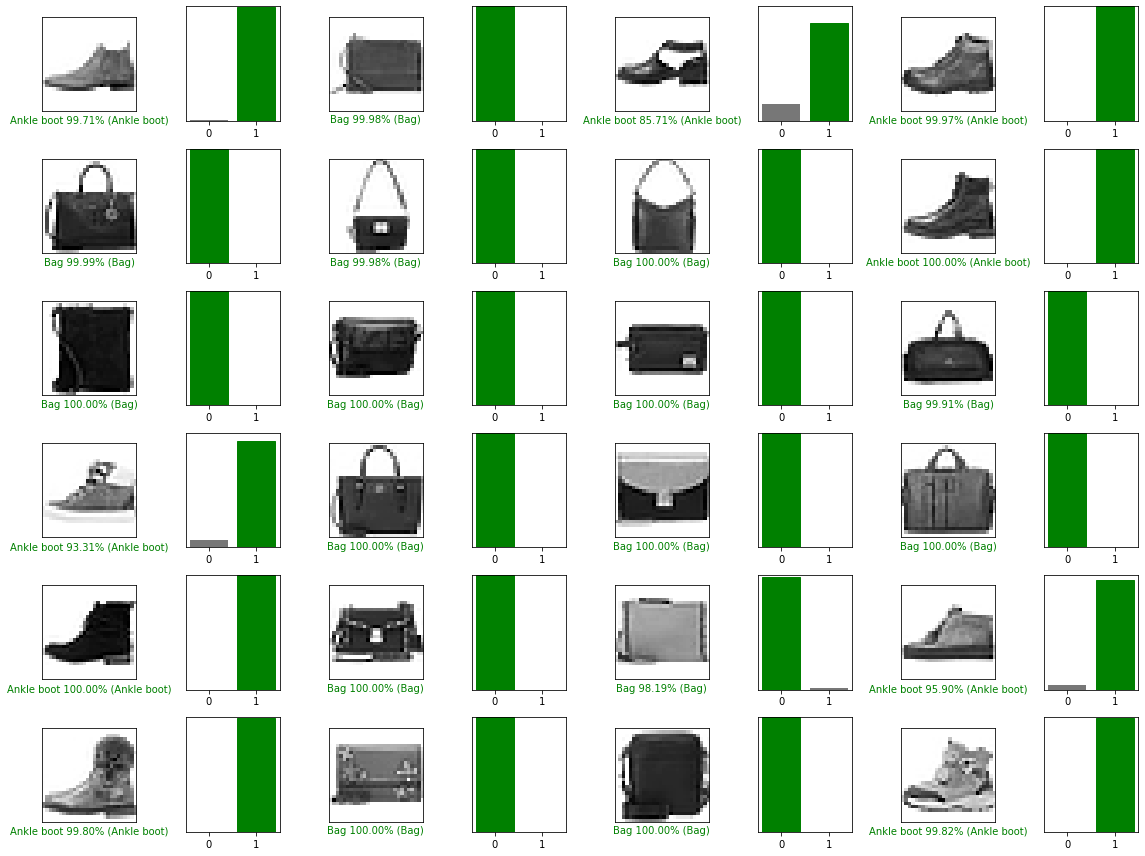

In [37]:
# to produce a mass tight sheet of predictions and their graph

num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plotImg(i, predictions2[i], TestLS2, TestImSplit2, class_names2on1)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plotGraph(i, predictions2[i], TestLS2, 2)
plt.tight_layout()
plt.show()